# Introduction

- The purpose of this TP is to learn how to **extract keywords** from a document or corpus of documents.

- **Keywords** are words (or sometimes phrases) that describe/characterize the main **topics** expressed in a document or corpus of documents.

- We will use a simple **keyword extraction method** which is based on the **tfidf-BOW** vector representation of documents.

- We will use the `scikit-learn` library to obtain the vector representation (and not the `gensim` library as we did in TP3).

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
#import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Read clean corpus from file

We will read data from file `news_corpus_clean.pickle` which contains the **preprocessed** (cleaned) corpus of news articles that we worked with in TP3. 

So notice that each document consists of lowercase stemmed words. Also, stopwords have been removed.

In [189]:
import pickle
with open('./news_corpus_clean.pickle', 'rb') as f:
    docs = pickle.load(f)
len(docs)

692

In [3]:
# The first 5 news articles in this corpus. Notice that they have been already PREPROCESSED.
docs[0:5]

['réveillon saied chahed fourat avenue habib bourguib cp président gouvern cadre suivi situat sécuritair occas fête fin année président',
 'kais saied 2020 année concrétis revend peuple kais saied vidéo diffus président républ président républ kaïs saïed présent mardi 31',
 'bct suspect placé garde vue affair détourn md banque central tunis banque central tunis indiqu mardi 31 décembr mission audit intern ordon cour décembr 2019 dévoil',
 'réveillon 97 tonnes produit alimentair impropr consomm détruit équip contrôl sanitair relev minister santé effectu jusqu 30 décembr 2019 plus 10870 visit inspect',
 'final tunisien gouvern avant 2020 habib jemli non annonc composit nouveau gouvern lieu avant 2020 comme annonc chargé commun']

## Generate count-BOW vectors using  `CountVectorizer` class

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

## first create the vocabulary (or dictionary) of words from our corpus of documents

MIN_DOC_FREQ = 5
count_bow_model = CountVectorizer(min_df=MIN_DOC_FREQ)  # words that have document frequency less than 5 are removed from vocabulary
count_bow_model.fit(docs)
vocab_list = count_bow_model.get_feature_names()
#same thing
#vocab_list = list(count_bow_model.vocabulary_.keys())

type(vocab_list), len(vocab_list)

(list, 484)

Let's look at the vocabulary. Notice that the words are arbitrarily ordered in ASCII order.

In [53]:
print(vocab_list)

['10', '12', '13', '14', '16', '1er', '2018', '2019', '2020', '30', '31', '40', '9alb', 'abbou', 'abdel', 'abir', 'accident', 'accord', 'accès', 'affair', 'affirm', 'agence', 'agricultur', 'ainsi', 'al', 'ali', 'ambassadeur', 'ancien', 'annonc', 'annuel', 'annul', 'année', 'ans', 'appel', 'appelé', 'apport', 'après', 'ariana', 'armes', 'armée', 'arp', 'assembl', 'associ', 'assur', 'assuré', 'attayar', 'attendu', 'attent', 'aucun', 'audit', 'augment', 'aujourd', 'auprès', 'avant', 'avoir', 'ayadi', 'bct', 'ben', 'berlin', 'biograph', 'bloc', 'blocs', 'brouillard', 'bureau', 'cabinet', 'cadre', 'candidat', 'carthag', 'central', 'certain', 'cet', 'cette', 'chahed', 'chang', 'chaouach', 'charg', 'chargé', 'chef', 'choix', 'choura', 'coalit', 'comme', 'comment', 'commerc', 'commiss', 'commun', 'communiqu', 'compos', 'composit', 'compte', 'compétent', 'concern', 'concert', 'condamn', 'confianc', 'confirm', 'conférent', 'consacr', 'conseil', 'conseiller', 'constitu', 'consult', 'contre', 'con

Create the feature vectors of all documents using count-based BOW representation.

In [8]:
count_bow_matrix = count_bow_model.transform(docs)

In [9]:
type(count_bow_matrix)

scipy.sparse.csr.csr_matrix

In [10]:
count_bow_matrix.shape

(692, 484)

In [11]:
# the number of non zero values in this matrix
count_bow_matrix.nnz,len(count_bow_matrix.data)

(7583, 7583)

In [12]:
# the min and max of the non zero values in this matrix
count_bow_matrix.data.min(),count_bow_matrix.data.max()

(1, 4)

Let's get the column that corresponds to the word *'saied'*

In [13]:
# first let's get the index of the word 'saied' in the matrix
token_id = count_bow_model.vocabulary_['saied']
token_id

394

In [14]:
column_vec = count_bow_matrix[:,token_id].A.ravel()
type(column_vec),column_vec.shape

(numpy.ndarray, (692,))

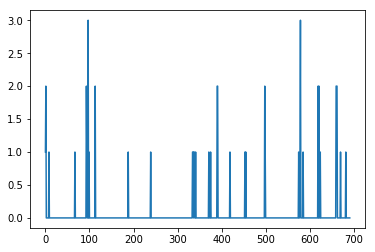

In [15]:
plt.plot(column_vec)

In [16]:
# number of zeros and the number of non-zero values in this vector
(column_vec==0).sum(),(column_vec>0).sum()

(655, 37)

In [17]:
column_vec.max()

3

In [18]:
column_vec.sum()

52

**Questions**

1. what do the values in `column_vec` correspond to?
2. the maximum value in this vector is 3; what does this mean?
3. the sum of values in this vector is 52; what does this mean?
4. the number of zero values in this vector is 655; what does this mean?
5. the number of non-zero values in this vector is 37; what does this mean?

#q1.
column "column_vec" corresponds to the vector that represents the word 'saied'

#q2.
la valeur 3 est la valeur maximale de frequence du mot saied dans un seul document 

#q3.
la valeur 52 est la valeur totale d'occurence de  mot saied dans tous les documents

#q4.
Il y a 655 documents qui ne contient pas le mot saied

#q5.
Il y a 37 documents qui contient le mot saied

Let's get the 7th row of the BOW matrix.

In [22]:
# the 7th row of the BOW matrix
row_vec = count_bow_matrix[6,:].A.ravel()
type(row_vec),row_vec.shape

(numpy.ndarray, (484,))

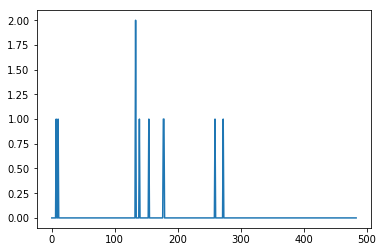

In [23]:
plt.plot(row_vec)

In [67]:
# number of zeros and non-zeros in this vector
(row_vec==0).sum(),(row_vec>0).sum()

(475, 9)

In [68]:
row_vec.max()

2

In [69]:
row_vec.sum()

10

**Questions**

1. what do the values in `row_vec` correspond to?
2. the maximum value in this vector is 2; what does this mean?
3. the sum of values in this vector is 10; what does this mean?
4. the number of zero values in this vector is 475; what does this mean?
5. the number of non-zero values in this vector is 9; what does this mean?

#q1.
row_vec is the 7th document 

#q2.
2 represent la frequence maximale par mot dans le 7eme document

#q3.
10 La somme totale des frequences des mots dans le 7eme document

#q4.
475 represnete le nombre des mots qui ne sont pas dans ce document

#q5. Il y a 9 mots qui sont dans le document 

## Generate tfidf-BOW vectors using  `TfidfVectorizer` class

In [24]:
?TfidfVectorizer

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_bow_model = TfidfVectorizer(min_df=MIN_DOC_FREQ, vocabulary=vocab_list, norm=None)
tfidf_bow_model.fit(docs)
assert vocab_list == tfidf_bow_model.get_feature_names()

Let's have a look at the IDF values of all vocabulary words.

**Remark**: the *IDF* of a word = *Inverse Document Frequency*; and the *Document Frequency* of a word = number of documents that contain that word.

In [26]:
words_idf = tfidf_bow_model.idf_
type(words_idf), len(words_idf)

(numpy.ndarray, 484)

In [27]:
words_idf[0:10]

array([5.05612335, 5.34380542, 4.90197267, 5.74927053, 5.74927053,
       5.05612335, 5.34380542, 3.73436751, 2.65822808, 4.65065824])

In [28]:
words_idf.min(), words_idf.max()

(1.8439365126844987, 5.749270529961848)

Let's determine the IDF value of the vocabulary word 'saied'.

In [29]:
# first determine the index of the word in the vocabulary
token_id = tfidf_bow_model.vocabulary_['saied']
token_id

394

In [30]:
# the idf of this word
words_idf[token_id]

3.9034438394635176

**Questions**

1. What is the IDF of the word 'jemli'?
2. Deduce the document frequency of this word, i.e. the number of documents that contain this word.
3. Is this word more frequent or less frequent than the word 'saied'? Explain.
4. Which word in our vocabulary has the highest document frequency?  Hint: the `argmin` function from the `numpy` library might be helpful. Alternatively you can just use a simple *for* loop.

In [31]:
#q1.
token_id1 = tfidf_bow_model.vocabulary_['jemli']
words_idf[token_id1]

2.3705460041517514

In [32]:
#q2.the number of documents that contain this word.
1/2.3705460041517514

0.4218437432762788

In [33]:
#q3. for the word saied
1/3.9034438394635176

0.25618403674470136

so saied is less frequent than jemli

In [35]:
#q4. tunis has the highest document frequency
import numpy as np
np.argmin(words_idf,axis=0)

446

In [40]:
vocab_list[446]

'tunis'

Create the feature vectors of all documents (tfidf-based BOW representation)

In [41]:
tfidf_bow_matrix = tfidf_bow_model.transform(docs)
type(tfidf_bow_matrix)

scipy.sparse.csr.csr_matrix

In [42]:
assert tfidf_bow_matrix.shape==count_bow_matrix.shape

In [43]:
# the number of non zero values in this matrix must be the same as the previous matrix
assert tfidf_bow_matrix.nnz==count_bow_matrix.nnz

In [44]:
# the min and max of the non zero values in this matrix
tfidf_bow_matrix.data.min(), tfidf_bow_matrix.data.max()

(1.8439365126844987, 17.247811589885544)

**Questions**

1. Determine the 3 words that have the highest tfidf values in the 7th document (row number 6 in the matrix). Hint: you should first extract the row vector of this document from the matrix as we did in the previous part ...
2. Determine the maximum tfidf value of the word `jemli`. Hint: first extract the column vector of this word from the matrix as we did in the previous part ...

In [147]:
row_tfidf = tfidf_bow_matrix[6,:].A.ravel()
row_tfidf.shape

(484,)

In [153]:
row_tfidf_df = pd.Series(row_tfidf, index=vocab_list)
row_tfidf_df.head(30)
row_tfidf_df.sort_values().tail(10)

environ      0.000000
2019         3.734368
décembr      3.930112
mardi        3.957511
minister     3.985682
31           4.768441
femme        5.143135
enfanc       5.461588
famill       5.749271
don         10.923177
dtype: float64

In [123]:
l=np.where(row_tfidf!=0)

In [125]:
l=l[0].tolist()
l

[7, 10, 133, 139, 154, 177, 178, 259, 272]

In [126]:
k={}
for i in l:
    
    k[i]=row_tfidf[i]
k

{7: 3.7343675094195836,
 10: 4.7684412769501225,
 133: 10.923176915020134,
 139: 3.930112086545679,
 154: 5.461588457510067,
 177: 5.749270529961848,
 178: 5.143134726391533,
 259: 3.9575110607337933,
 272: 3.9856819377004897}

In [154]:
dicti={j: v for j, v in sorted(k.items(), key=lambda item: item[1],reverse=True)}
list_keys=list(dicti.keys())
list_keys=list_keys[0:3]
for m in list_keys:
    print(vocab_list[m])

don
famill
enfanc


In [142]:
token_id1

231

In [143]:
tfidf_jemli

0.0

In [144]:
#q2.

tfidf_column = tfidf_bow_matrix[:,token_id1].A.ravel()

In [146]:
np.argmax(tfidf_column,axis=0)

98

## Extract keywords of each document using tfidf vectors

**Questions**

1. For each document, determine the list of 5 words that correspond to the largest nonzero tfidf values. *Note*: If a document has $n$ nonzero tfidf values and $n<5$, then the list should contain only $n$ words. Store the result for all documents in the corpus in a list of lists called `docs_keywords`.
2. Print each document and its corresponding keywords on a separate line. Hint: you just need to iterate over the 2 lists `docs` and `docs_keywords` and print their elements.
3. Do the keywords change if you use `ngram_range=2` in the creation of the `TfidfVectorizer` instance above? 

In [183]:
#q1.
docs_keywords=[]
for i in range(tfidf_bow_matrix.shape[0]):
    row_tfidf = tfidf_bow_matrix[i,:].A.ravel()

    row_tfidf_df = pd.Series(row_tfidf, index=vocab_list)
    row_tfidf_df.head(30)
    rr=row_tfidf_df.sort_values().tail(5)
    m=rr>0.0
    s=m[m.values==True].index
    docs_keywords.append(list(s))
    
    

In [182]:
#q2.
docs_keywords

[['président', 'fin', 'sécuritair', 'cp', 'cadre'],
 ['président', 'vidéo', 'républ', 'saied', 'kais'],
 ['bct', 'suspect', 'audit', 'décembr', 'central'],
 ['minister', 'plus', '30', 'santé', 'effectu'],
 ['2020', 'lieu', 'final', 'annonc', 'avant'],
 ['gouverneur', 'devis', 'révèle', 'bct', 'audit'],
 ['31', 'femme', 'enfanc', 'famill', 'don'],
 ['soupçon', 'radio', 'shems', 'corrupt', 'inlucc'],
 ['critiqu', 'surpris', 'décis', 'urgenc', 'état'],
 ['sécur', 'intérieur', 'décidé', 'cadre', 'toute'],
 ['el', 'cours', 'dinars', 'mille', 'augment'],
 ['où', 'hier', 'issue', 'social', 'route'],
 ['observ', 'être', 'plusieur', 'grève', 'hôpital'],
 ['31', 'soirée', 'fois', 'expliqu', 'gouvern'],
 ['année', 'premi', 'né', 'nouveau', 'fm'],
 ['effectu', 'saïed', 'kaïs', 'visite', 'central'],
 ['youssef', 'gestion', 'saïed', 'chahed', 'central'],
 ['31', 'toutes', 'saïed', 'kaïs', 'tunisien'],
 ['nuageux', 'durant', 'ensembl', 'mercred', '1er'],
 ['chahed', 'instanc', 'inform', 'annuel', 'ac

In [186]:
for i in range(len(docs)):
    print(docs[i],docs_keywords[i])

réveillon saied chahed fourat avenue habib bourguib cp président gouvern cadre suivi situat sécuritair occas fête fin année président ['président', 'fin', 'sécuritair', 'cp', 'cadre']
kais saied 2020 année concrétis revend peuple kais saied vidéo diffus président républ président républ kaïs saïed présent mardi 31 ['président', 'vidéo', 'républ', 'saied', 'kais']
bct suspect placé garde vue affair détourn md banque central tunis banque central tunis indiqu mardi 31 décembr mission audit intern ordon cour décembr 2019 dévoil ['bct', 'suspect', 'audit', 'décembr', 'central']
réveillon 97 tonnes produit alimentair impropr consomm détruit équip contrôl sanitair relev minister santé effectu jusqu 30 décembr 2019 plus 10870 visit inspect ['minister', 'plus', '30', 'santé', 'effectu']
final tunisien gouvern avant 2020 habib jemli non annonc composit nouveau gouvern lieu avant 2020 comme annonc chargé commun ['2020', 'lieu', 'final', 'annonc', 'avant']
détourn erreur audit bct révèle manque av

In [191]:
?TfidfVectorizer

In [192]:
tfidf_bow_model_ng = TfidfVectorizer(min_df=MIN_DOC_FREQ, vocabulary=vocab_list,ngram_range=(1,2),norm=None)
tfidf_bow_model_ng.fit(docs)

tfidf_bow_matrix_ng = tfidf_bow_model_ng.transform(docs)

docs_keywords_ng=[]
for i in range(tfidf_bow_matrix_ng.shape[0]):
    row_tfidf_ng = tfidf_bow_matrix_ng[i,:].A.ravel()

    row_tfidf_df_ng = pd.Series(row_tfidf_ng, index=vocab_list)
    row_tfidf_df_ng.head(30)
    rr1=row_tfidf_df_ng.sort_values().tail(5)
    m1=rr1>0.0
    s1=m1[m1.values==True].index
    docs_keywords_ng.append(list(s1))

In [196]:

set(docs_keywords[i])-set(docs_keywords_ng[i])

set()

#q4. Il n y a pas dde difference

## Extract keywords of entire corpus using tfidf vectors

**Questions**

1. For each vocabulary word, determine the number of documents in which this word has the highest tfidf value. Put these values in a list or dictionary containing one element per word.
2. Find 20 words that have the highest values in the list or dictionary of the previous question. These are the top 20 keywords for this corpus.

## Extract keywords using `yake` library

In [199]:
!pip install yake

     |████████████████████████████████| 61kB 15kB/s eta 0:00:013
     |████████████████████████████████| 81kB 44kB/s eta 0:00:01
     |████████████████████████████████| 143kB 11kB/s eta 0:00:011
     |████████████████████████████████| 245kB 27kB/s eta 0:00:01
     |████████████████████████████████| 696kB 30kB/s eta 0:00:01
  Stored in directory: /home/ubuntu/.cache/pip/wheels/90/7d/56/63a3a3b064e9214e29616880dc4170a300ca68643728ce24ba
  Stored in directory: /home/ubuntu/.cache/pip/wheels/31/9c/c0/07b6dc7faf1844bb4688f46b569efe6cafaa2179c95db821da
  Stored in directory: /home/ubuntu/.cache/pip/wheels/15/ee/a8/6112173f1386d33eebedb3f73429cfa41a4c3084556bcee254
  Stored in directory: /home/ubuntu/.cache/pip/wheels/e8/fe/99/d8fa8f2ef7b82a625b0b77a84d319b0b50693659823c4effb4
Successfully built yake fire segtok jellyfish
You should consider upgrading via the 'pip install --upgrade pip' command.


In [200]:
# You should first install this library using 'pip install yake'
import yake

In [203]:
?yake.KeywordExtractor

In [206]:
## hyperparameters of the method
language = "fr"
numOfKeywords = 20
max_ngram_size = 2

## initialize method
kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, top=numOfKeywords, features=None)

## execute method on our corpus
keywords = kw_extractor.extract_keywords('\n'.join(docs))
len(keywords)

## The keywords in decreasing order of importance
for kw,kw_score in keywords:
    print(kw,kw_score)

1.092019881807742e-05 habib jemli
2.0506770097604446e-05 président républ
2.6347219318938902e-05 chef gouvern
3.1459078119502876e-05 gouvern jemli
3.398982408559801e-05 gouvern habib
3.722101241402077e-05 kaïs saïed
3.750733265302971e-05 gouvern désign
3.809688051841097e-05 désign habib
4.90216762777419e-05 confianc gouvern
5.3158182826661784e-05 vote confianc
5.8563161102929325e-05 composit gouvern
6.07513285123502e-05 rached ghannouch
6.309901169783439e-05 kais saied
6.47027574709263e-05 mercred janvi
6.899067029675404e-05 jeudi janvi
8.072788662109016e-05 qalb tounes
0.00010180330794691623 poste ministr
0.00010389782922360399 républ kaïs
0.00011828165344044165 membr gouvern
0.0001196737258605368 gouvern


**Questions**

1. re-run the above cell with `max_ngram_size=1` and then with `max_ngram_size=3`.
2. which value of `max_ngram_size` gives better results do you think, 1, 2, or 3? Explain.

In [208]:
## hyperparameters of the method
language = "fr"
numOfKeywords = 20
max_ngram_size = 1

## initialize method
kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, top=numOfKeywords, features=None)

## execute method on our corpus
keywords = kw_extractor.extract_keywords('\n'.join(docs))
len(keywords)

## The keywords in decreasing order of importance
for kw,kw_score in keywords:
    print(kw,kw_score)

0.0001196737258605368 gouvern
0.00018162506914865624 jemli
0.0001932938623395167 habib
0.00022247916270247618 président
0.0002412065286601851 janvi
0.00025092611607411696 tunis
0.00034701630858026205 ministr
0.00043723220227020776 républ
0.00044570001624501325 ennahdh
0.00046293942040543447 chef
0.0006106386709219496 confianc
0.0006201849845728137 saïed
0.0006208054426117128 propos
0.0006839091444875142 ghannouch
0.0006941478188889549 tounes
0.0007007848787372036 désign
0.0007020559619446477 annonc
0.0007250827866085454 kaïs
0.0008429177603156099 arp
0.000901582783900761 composit


In [209]:
## hyperparameters of the method
language = "fr"
numOfKeywords = 20
max_ngram_size = 3

## initialize method
kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, top=numOfKeywords, features=None)

## execute method on our corpus
keywords = kw_extractor.extract_keywords('\n'.join(docs))
len(keywords)

## The keywords in decreasing order of importance
for kw,kw_score in keywords:
    print(kw,kw_score)

1.550338339927518e-06 chef gouvern désign
1.7563374580614153e-06 gouvern désign habib
1.9041310955103974e-06 gouvern habib jemli
2.124073504974804e-06 désign habib jemli
4.438012762288878e-06 vote confianc gouvern
4.616881610457519e-06 président républ kaïs
4.6232232226997845e-06 confianc gouvern jemli
5.722774679339226e-06 chef gouvern chargé
5.82322395184225e-06 républ kaïs saïed
7.2203110921702385e-06 gouvern propos habib
7.23233149320159e-06 chargé habib jemli
7.261708968049976e-06 gouvern chargé habib
7.617521054040212e-06 propos poste ministr
7.774236816177119e-06 habib jemli chef
7.910217393849318e-06 propos habib jemli
8.485381336059558e-06 assembl représent peuple
8.71579716980831e-06 jemli chef gouvern
8.790078476316595e-06 habib jemli annonc
8.850346436683682e-06 confianc gouvern habib
1.030299163402437e-05 représent peuple arp


In [ ]:
max_ngram_size=3 gives better results then other because it gives us phrases.